In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:

# Generate sample data
X = np.arange(0, 1, 0.02).reshape(-1, 1).astype(np.float32)
y = np.zeros_like(X, dtype=np.float32)
y[np.logical_and(X > 0.45, X < 0.55)] = 1.0

# Define the neural network architecture
input_dim = X.shape[1]
hidden_dim = 2
output_dim = 1



In [29]:
# Weights and biases initialization
weights_hidden = tf.Variable(tf.random.normal([input_dim, hidden_dim], stddev=0.1))
biases_hidden = tf.Variable(tf.random.normal([hidden_dim], stddev=0.1))
weights_output = tf.Variable(tf.random.normal([hidden_dim, output_dim], stddev=0.1))
biases_output = tf.Variable(tf.random.normal([output_dim], stddev=0.1))

# Define the neural network model
def neural_network(x):
    hidden_layer = tf.nn.softplus(tf.add(tf.matmul(x, weights_hidden), biases_hidden))
    output_layer = tf.add(tf.matmul(hidden_layer, weights_output), biases_output)
    return output_layer

# Define the loss function
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred))




In [30]:
# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = neural_network(X)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, [weights_hidden, biases_hidden, weights_output, biases_output])
    optimizer.apply_gradients(zip(gradients, [weights_hidden, biases_hidden, weights_output, biases_output]))

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy()}")

Epoch 0, Loss: 0.7523741722106934
Epoch 100, Loss: 0.3265342712402344
Epoch 200, Loss: 0.32602301239967346
Epoch 300, Loss: 0.3256060481071472
Epoch 400, Loss: 0.3252962827682495
Epoch 500, Loss: 0.3250811696052551
Epoch 600, Loss: 0.32491061091423035
Epoch 700, Loss: 0.3246919512748718
Epoch 800, Loss: 0.3242062032222748
Epoch 900, Loss: 0.32284459471702576


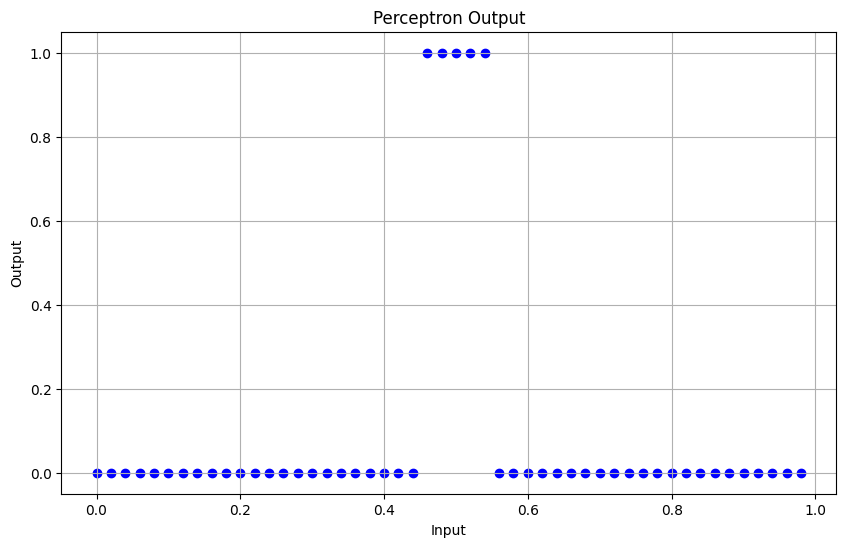

In [31]:
# Plot the perceptron
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Perceptron Output')
plt.grid(True)


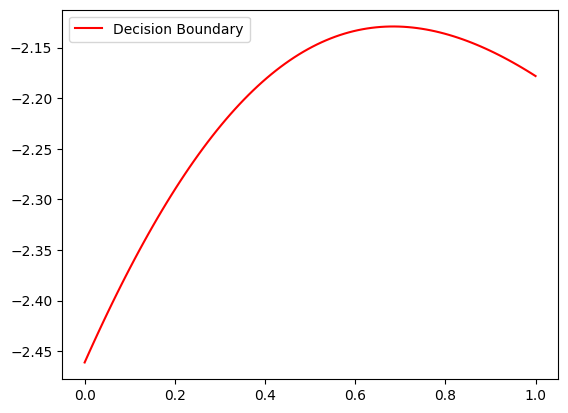

In [32]:

# Plot the decision boundary
x_values = np.linspace(0, 1, 100).astype(np.float32)
y_values = neural_network(x_values.reshape(-1, 1)).numpy().flatten()
plt.plot(x_values, y_values, color='red', label='Decision Boundary')
plt.legend()
plt.show()

In [44]:
# Print the weights and biases
print("Weights of the output layer:")
print(trained_weights_output)

print("\nBiases of the output layer:")
print(trained_biases_output)

Weights of the output layer:
[[-0.7513461]
 [-0.7236647]]

Biases of the output layer:
[-0.6780719]


In [47]:
optimizer.apply_gradients(zip(gradients, [weights_hidden, biases_hidden, weights_output, biases_output]))

# Extract updated values
updated_weights_hidden = weights_hidden.numpy()
updated_biases_hidden = biases_hidden.numpy()
updated_weights_output = weights_output.numpy()
updated_biases_output = biases_output.numpy()

# Print updated weights and biases
print("Updated weights of the hidden layer:")
print(updated_weights_hidden)
print("\nUpdated biases of the hidden layer:")
print(updated_biases_hidden)
print("\nUpdated weights of the output layer:")
print(updated_weights_output)
print("\nUpdated biases of the output layer:")
print(updated_biases_output)

Updated weights of the hidden layer:
[[-2.8289168  0.8474104]]

Updated biases of the hidden layer:
[0.7606616 0.9491955]

Updated weights of the output layer:
[[-0.75277567]
 [-0.7236104 ]]

Updated biases of the output layer:
[-0.6779256]
